In [46]:
import pandas as pd

In [47]:
df = pd.read_csv("HR_comma_sep.csv")

In [48]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**incomplete**

In [49]:
X = df[['time_spend_company']]
X.head()

,time_spend_company
0,3
1,6
2,4
3,5
4,3


In [50]:
Y = df['left']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

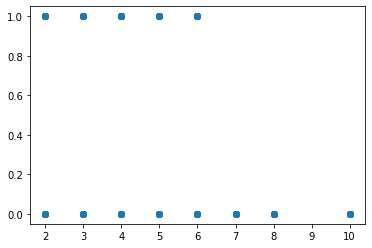

In [51]:
from matplotlib import pyplot as plt
plt.scatter(X,Y)

In [52]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [53]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [66]:
# by dummy variable
import pandas as pd
dummy = pd.get_dummies(subdf.salary,prefix="salary")
dummy.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [81]:
X_new = pd.concat([subdf,dummy],axis="columns")
# df_with_dummies = pd.concat([subdf,dummy],axis='columns')

#drop the salary and salary_medium
X = X.drop(['salary_medium','salary'],axis="columns")
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [82]:
Y = df['left']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.45)

In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [105]:
model.fit(X_train,Y_train)

LogisticRegression()

In [101]:
Y_predicted = model.predict(X_train)

In [102]:
model.score(X_test,Y_test)

0.7713333333333333